Loomis

Rapid Micro- Data Analysis of Temperature Variations over 24hrs taken at nine locations.

Column Names

In [21]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\loomi\Desktop\DataAn\LC.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Print the column names
print(df.columns)

Index([2021-10-15 00:00:00,             'LC 01',             'LC 02',
                   'LC 03',             'LC 04',             'LC 05',
                   'LC 06',             'LC 07',             'LC 08',
                   'LC 09'],
      dtype='object')


First, we look at the statistics of each location individually.

In [44]:
column_names = df.columns[1:]

for column_name in column_names:
    # Calculate standard deviation
    std_deviation = df[column_name].std()

    # Calculate mean
    mean_value = df[column_name].mean()

    # Calculate median
    median_value = df[column_name].median()

    # Calculate mode
    mode_values = df[column_name].mode()
    mode_counts = df[column_name].value_counts()

    # Print the results
    print(f"Column: {column_name}")
    print(f"Standard Deviation: {std_deviation}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_values}")
    print(f"Mode Counts: {mode_counts}")
    print()


Column: LC 01
Standard Deviation: 0.09543068062491186
Mean: 31.627827897293542
Median: 31.6
Mode: 0    31.6
Name: LC 01, dtype: float64
Mode Counts: 31.6    777
31.7    594
31.5     29
31.4     12
31.3      8
31.2      7
30.9      4
31.0      4
31.1      4
30.8      2
Name: LC 01, dtype: int64

Column: LC 02
Standard Deviation: 0.07116008577200182
Mean: 31.763705759888968
Median: 31.8
Mode: 0    31.8
Name: LC 02, dtype: float64
Mode Counts: 31.8    1015
31.7     383
31.6      18
31.5      10
31.3       6
31.4       5
31.2       4
Name: LC 02, dtype: int64

Column: LC 03
Standard Deviation: 0.04980386002856636
Mean: 22.85461485079806
Median: 22.9
Mode: 0    22.9
Name: LC 03, dtype: float64
Mode Counts: 22.9    787
22.8    654
Name: LC 03, dtype: int64

Column: LC 04
Standard Deviation: 0.22972544015603122
Mean: 30.720333102012493
Median: 30.8
Mode: 0    30.8
Name: LC 04, dtype: float64
Mode Counts: 30.8    896
30.7    379
30.9     43
30.6     29
30.5     17
30.4     12
30.3      9
30.2 

The location with the largest standard deviation and the most variance in temperature is LC 04 at 0.22. The least is at LC 08 whose temperature appears not to have changed, excluding this point LC 06 has the second lowest standard deviation at 0.016.

Next, we create histograms of each location showing the number of occurrences for each temperature value at that location.

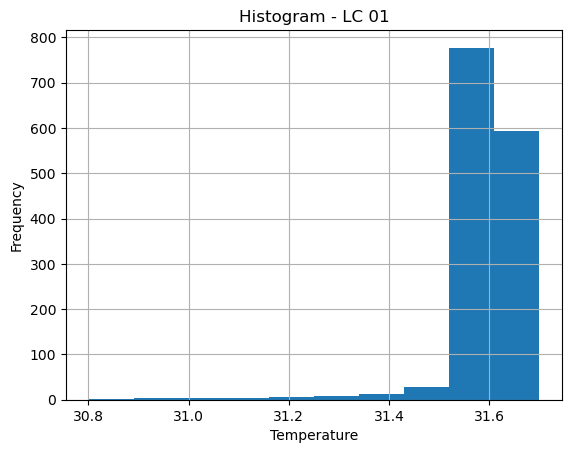

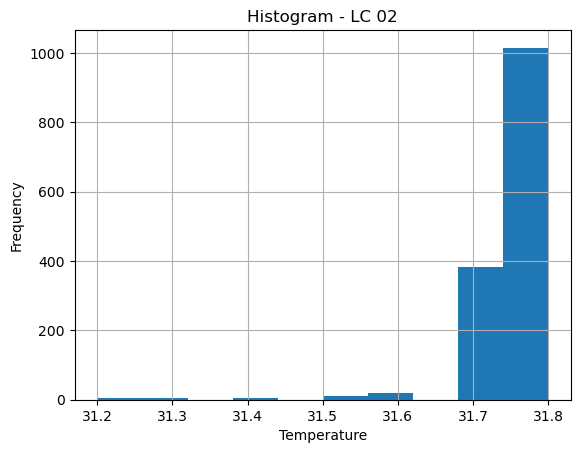

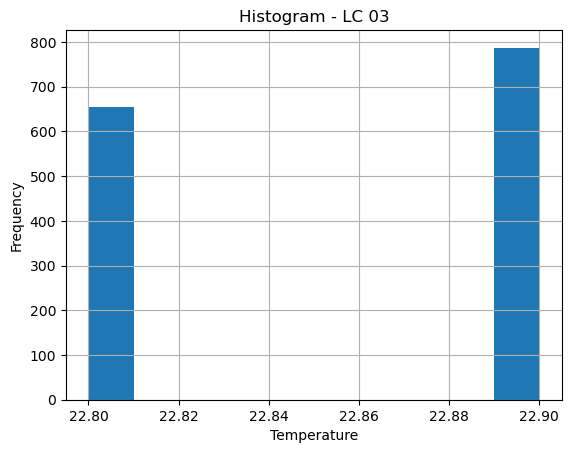

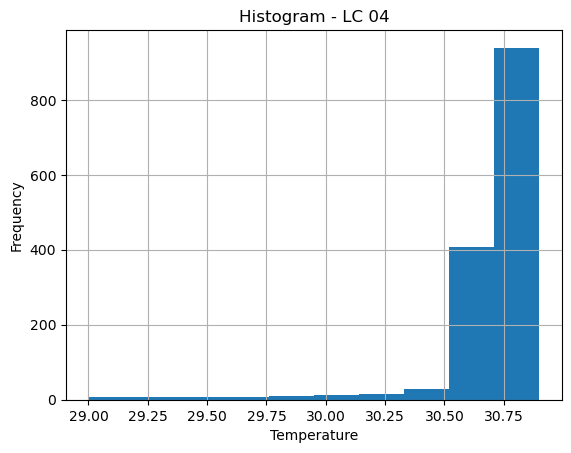

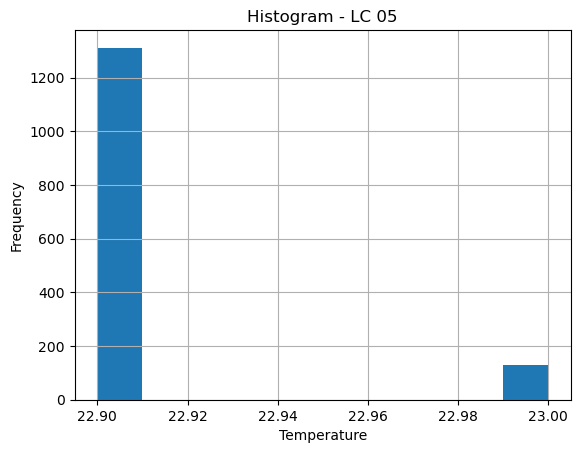

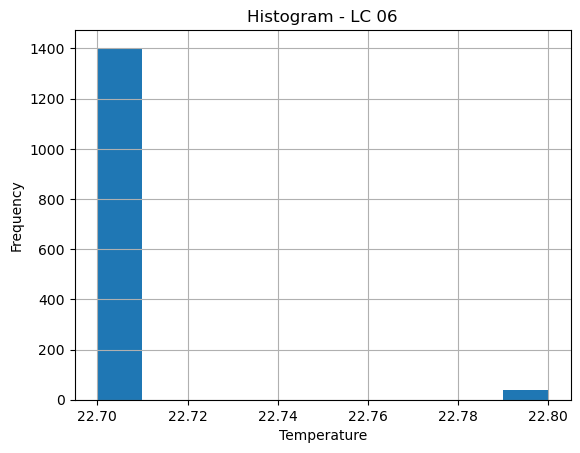

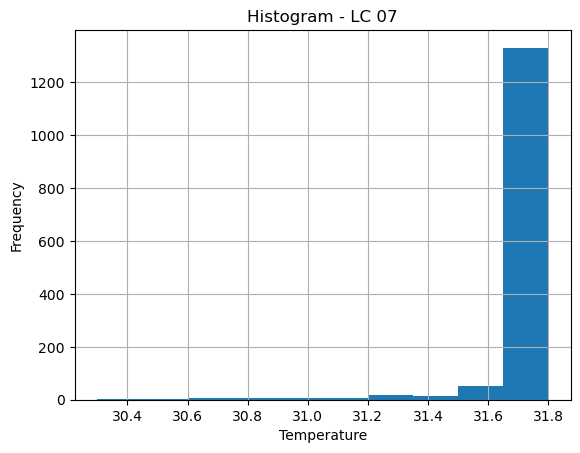

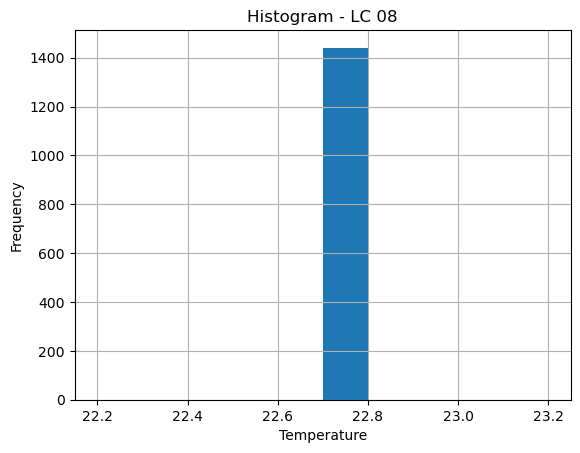

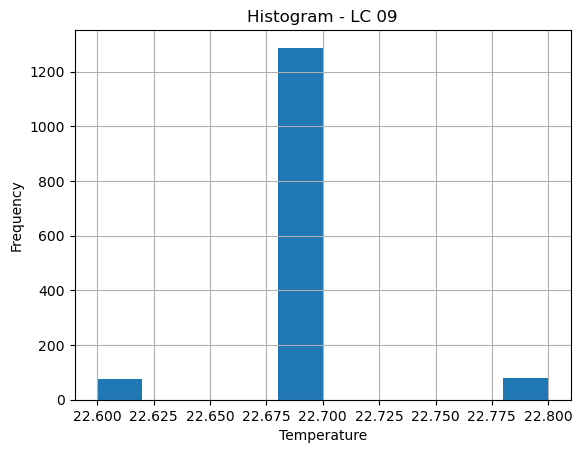

In [28]:
import matplotlib.pyplot as plt

column_names = df.columns[1:]

# Iterate over column names
for column_name in column_names:
    # Create a new figure and axes for each column
    fig, ax = plt.subplots()

    # Plot the histogram of the column
    df[column_name].hist(ax=ax)

    # Set the labels and title
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram - {column_name}')

    # Show the plot
    plt.show()


The next graph breaks down the 24hr time period into four 6hr time periods for ease of viewing. 

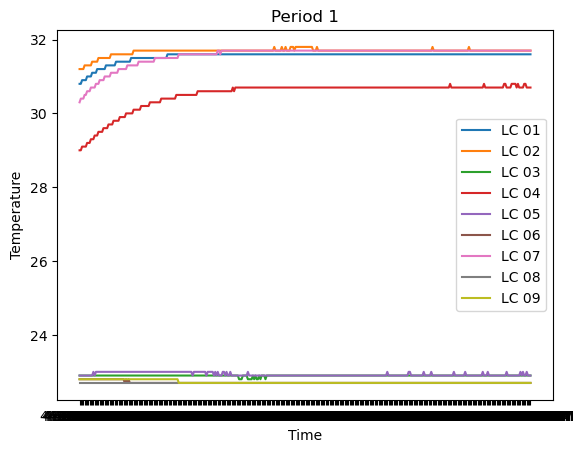

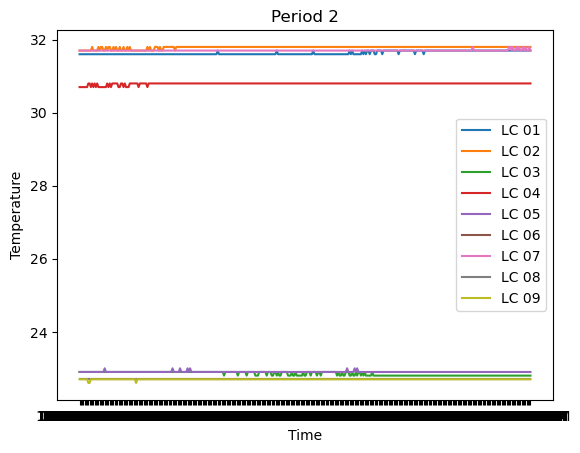

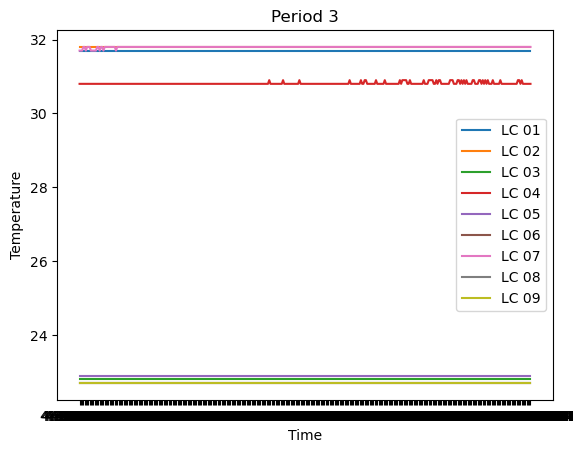

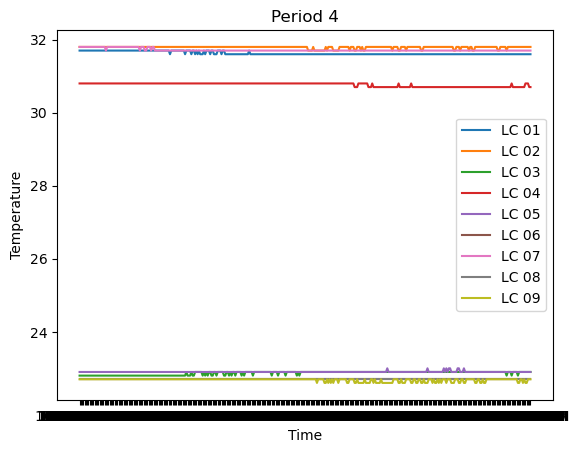

In [46]:
# Extract column names
column_names = df.columns[1:]

# Slice the DataFrame to get the time values and data values
time_values = df.iloc[:, 0].values
data_values = df.iloc[:, 1:].values

# Calculate the number of data points per 6-hour period
data_points_per_period = 360

# Calculate the number of periods
num_periods = len(time_values) // data_points_per_period

# Iterate over the periods and plot the data
for period in range(num_periods):
    start_index = period * data_points_per_period
    end_index = (period + 1) * data_points_per_period
    
    # Slice the time values for the current period
    period_time_values = time_values[start_index:end_index]
    
    # Slice the data values for the current period
    period_data_values = data_values[start_index:end_index, :]
    
    # Plot the data for the current period
    for i, column_name in enumerate(column_names):
        plt.plot(period_time_values, period_data_values[:, i], label=column_name)
    
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title(f'Period {period+1}')
    plt.legend()
    plt.show()


Noticing how the temperatures of certain locations are grouped together, the next code breaks them into two distinct groups over the same four 6hr periods.

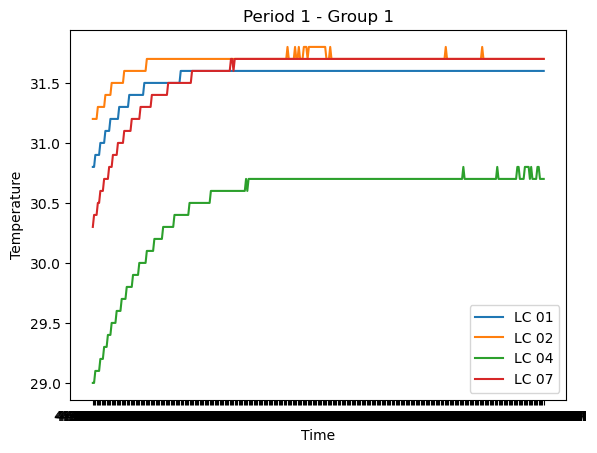

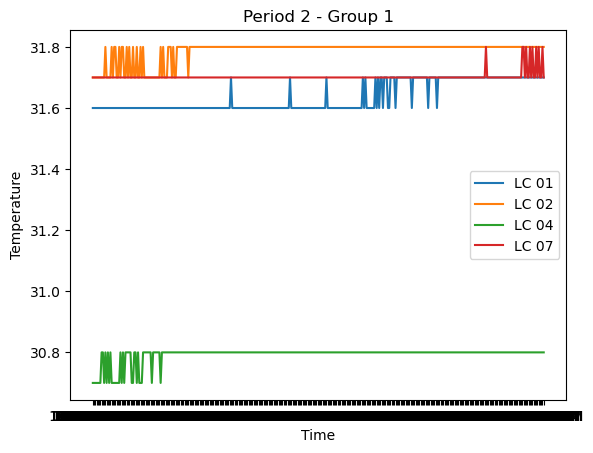

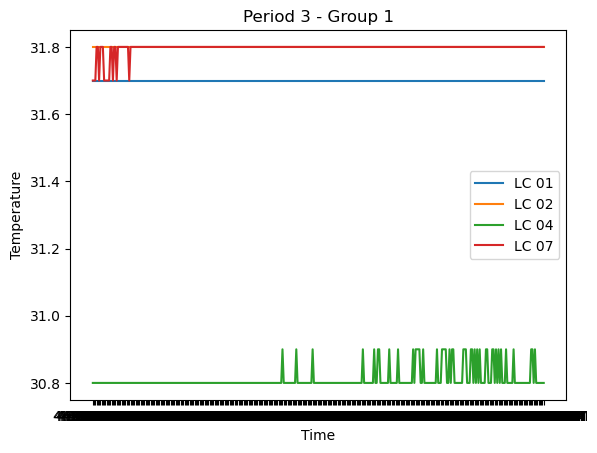

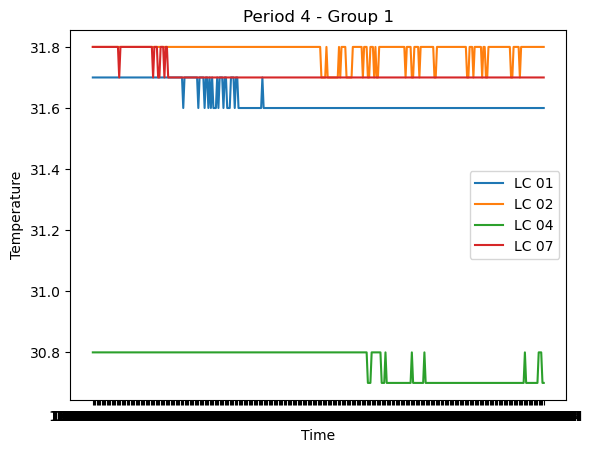

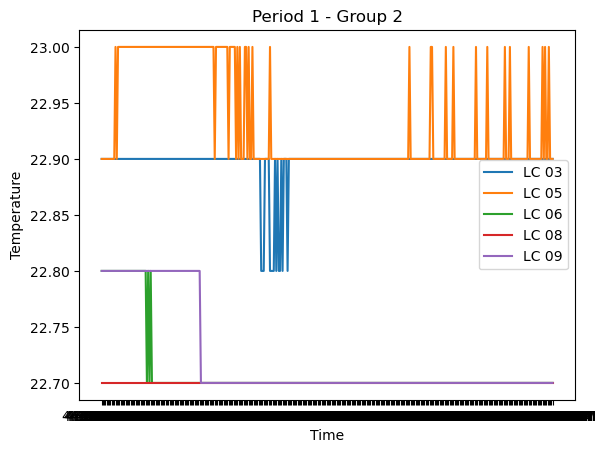

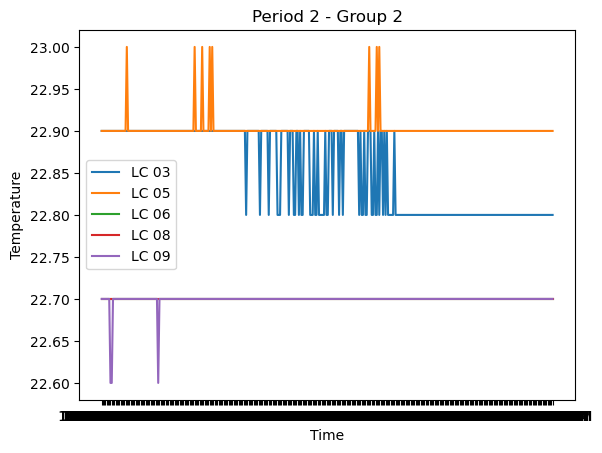

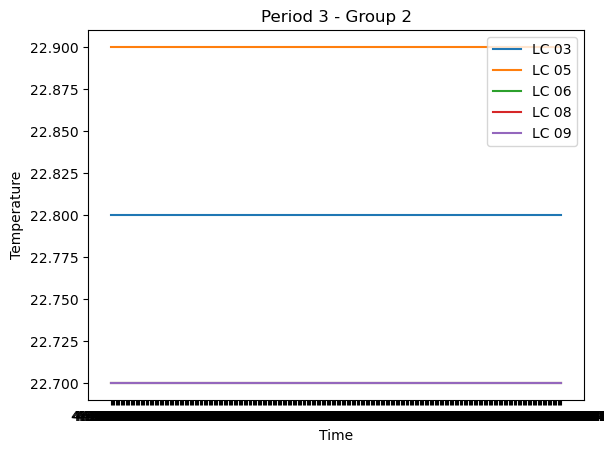

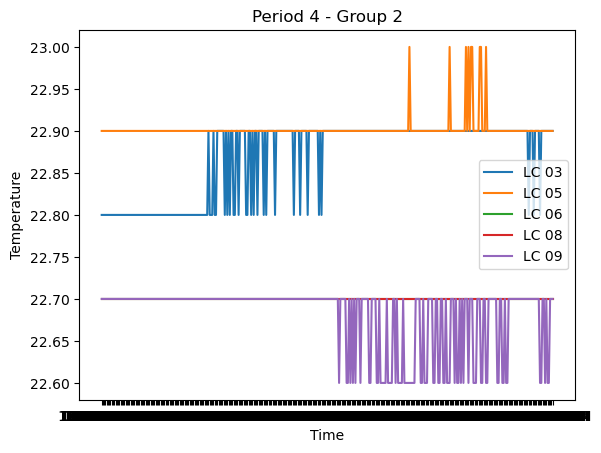

In [45]:
# Define the groupings of columns
group1 = ["LC 01", "LC 02", "LC 04", "LC 07"]
group2 = ["LC 03", "LC 05", "LC 06", "LC 08", "LC 09"]

# Plot the data for the first group
for period in range(num_periods):
    start_index = period * data_points_per_period
    end_index = (period + 1) * data_points_per_period
    
    period_time_values = time_values[start_index:end_index]
    period_data_values = data_values[start_index:end_index, :]
    
    for column_name in group1:
        column_index = column_names.get_loc(column_name)
        plt.plot(period_time_values, period_data_values[:, column_index], label=column_name)
    
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title(f'Period {period+1} - Group 1')
    plt.legend()
    plt.show()

# Plot the data for the second group
for period in range(num_periods):
    start_index = period * data_points_per_period
    end_index = (period + 1) * data_points_per_period
    
    period_time_values = time_values[start_index:end_index]
    period_data_values = data_values[start_index:end_index, :]
    
    for column_name in group2:
        column_index = column_names.get_loc(column_name)
        plt.plot(period_time_values, period_data_values[:, column_index], label=column_name)
    
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title(f'Period {period+1} - Group 2')
    plt.legend()
    plt.show()


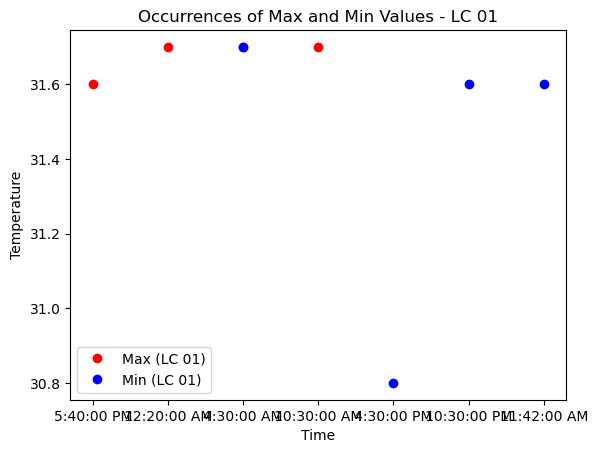

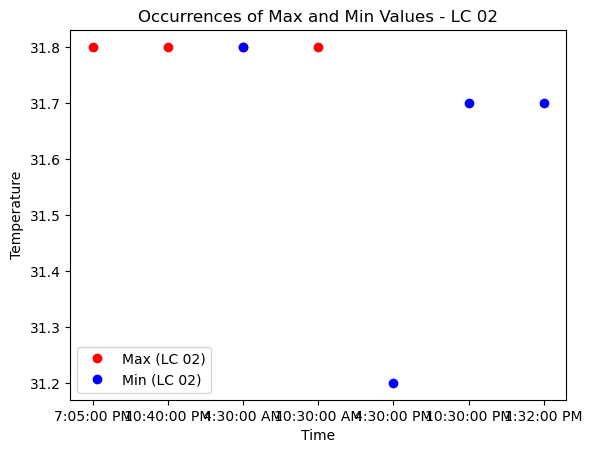

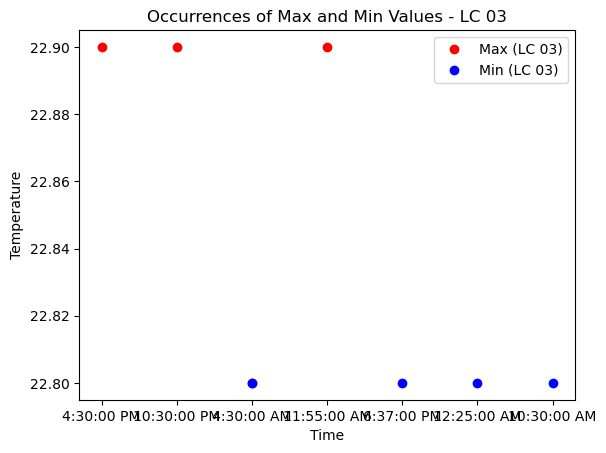

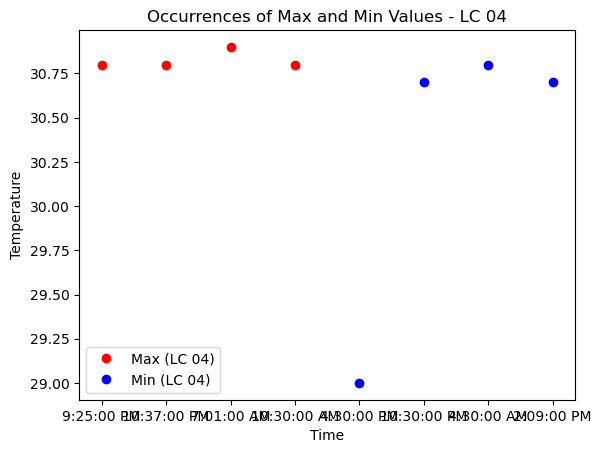

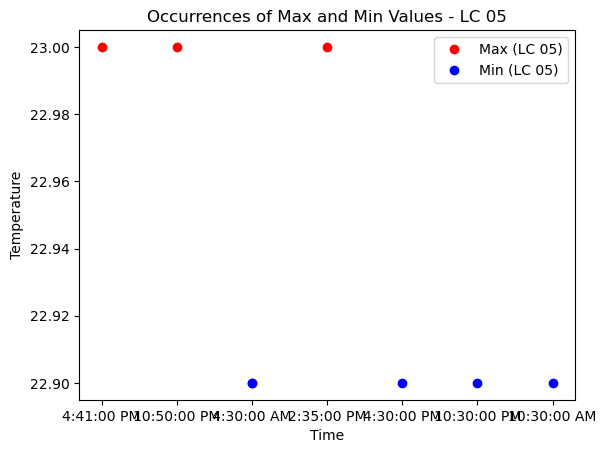

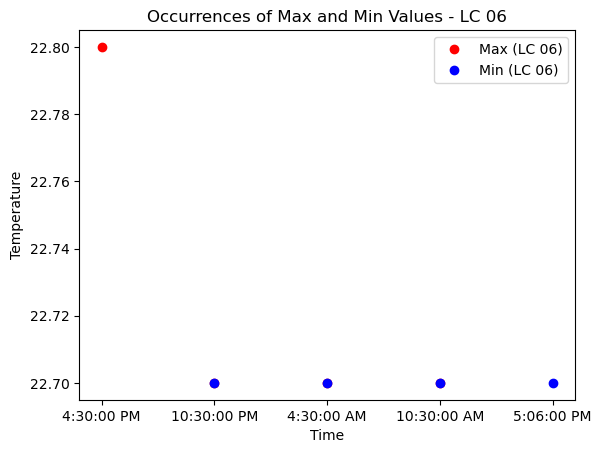

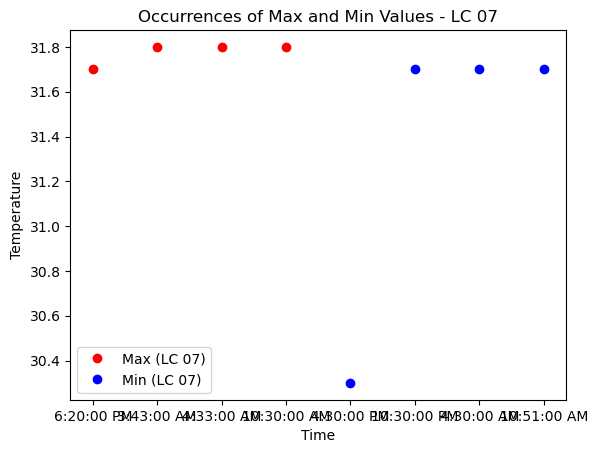

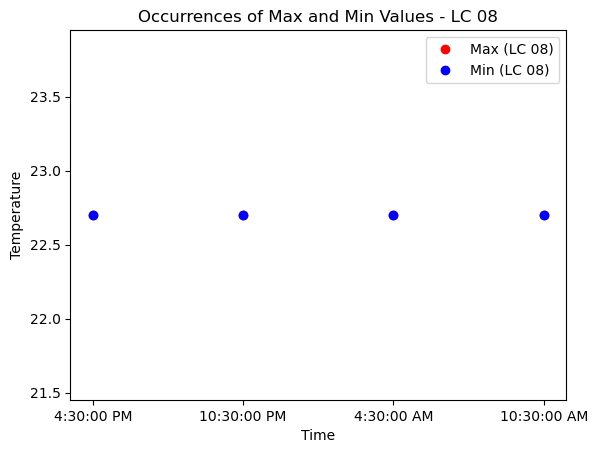

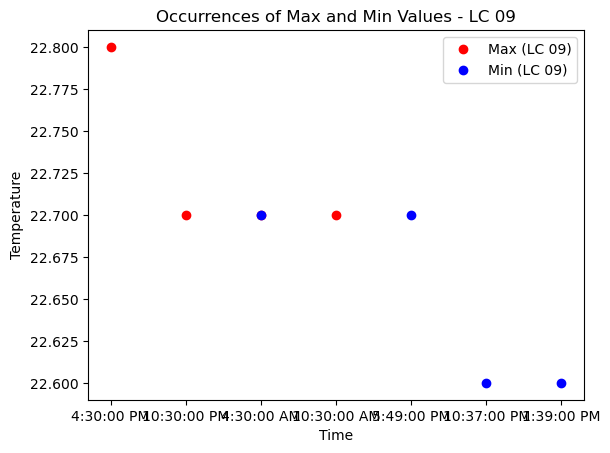

In [40]:
import numpy as np

# Initialize lists to store the results
max_values = [[] for _ in range(len(column_names))]
max_indices = [[] for _ in range(len(column_names))]
min_values = [[] for _ in range(len(column_names))]
min_indices = [[] for _ in range(len(column_names))]

# Iterate over the periods and calculate the statistics for each column
for period in range(num_periods):
    start_index = period * data_points_per_period
    end_index = (period + 1) * data_points_per_period
    
    # Slice the data values for the current period
    period_data_values = data_values[start_index:end_index, :]
    
    # Calculate the statistics for each column
    for i, column_name in enumerate(column_names):
        column_data = period_data_values[:, i]
        
        # Find max value and index
        max_value = np.max(column_data)
        max_index = start_index + np.argmax(column_data)
        max_values[i].append(max_value)
        max_indices[i].append(max_index)
        
        # Find min value and index
        min_value = np.min(column_data)
        min_index = start_index + np.argmin(column_data)
        min_values[i].append(min_value)
        min_indices[i].append(min_index)

# Plot the occurrences of max and min indices for each column separately
for i, column_name in enumerate(column_names):
    plt.figure()
    plt.plot(time_values[max_indices[i]], max_values[i], 'ro', label=f'Max ({column_name})')
    plt.plot(time_values[min_indices[i]], min_values[i], 'bo', label=f'Min ({column_name})')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title(f'Occurrences of Max and Min Values - {column_name}')
    plt.legend()
    plt.show()



Next we will show the difference between the min and max at each location; this goes to show the greatest differences are in group1's data

In [48]:
# Initialize lists to store the results
max_values = []
max_indices = []
min_values = []
min_indices = []
differences = []

# Iterate over the periods and calculate the statistics for each column
for period in range(num_periods):
    start_index = period * data_points_per_period
    end_index = (period + 1) * data_points_per_period
    
    # Slice the data values for the current period
    period_data_values = data_values[start_index:end_index, :]
    
    # Calculate the statistics for each column
    for i, column_name in enumerate(column_names):
        column_data = period_data_values[:, i]
        
        # Find max value and index
        max_value = np.max(column_data)
        max_index = start_index + np.argmax(column_data)
        max_values.append(max_value)
        max_indices.append(max_index)
        
        # Find min value and index
        min_value = np.min(column_data)
        min_index = start_index + np.argmin(column_data)
        min_values.append(min_value)
        min_indices.append(min_index)
        
        # Calculate difference
        difference = max_value - min_value
        differences.append(difference)

# Print the differences at each location
for i, column_name in enumerate(column_names):
    print(f"Location: {column_name}")
    print(f"Max Value: {max_values[i]}")
    print(f"Min Value: {min_values[i]}")
    print(f"Difference: {differences[i]}")
    print()


Location: LC 01
Max Value: 31.6
Min Value: 30.8
Difference: 0.8000000000000007

Location: LC 02
Max Value: 31.8
Min Value: 31.2
Difference: 0.6000000000000014

Location: LC 03
Max Value: 22.9
Min Value: 22.8
Difference: 0.09999999999999787

Location: LC 04
Max Value: 30.8
Min Value: 29.0
Difference: 1.8000000000000007

Location: LC 05
Max Value: 23.0
Min Value: 22.9
Difference: 0.10000000000000142

Location: LC 06
Max Value: 22.8
Min Value: 22.7
Difference: 0.10000000000000142

Location: LC 07
Max Value: 31.7
Min Value: 30.3
Difference: 1.3999999999999986

Location: LC 08
Max Value: 22.7
Min Value: 22.7
Difference: 0.0

Location: LC 09
Max Value: 22.8
Min Value: 22.7
Difference: 0.10000000000000142



The next two blocks show the Box and Whisker plots for the  two groups. These graphs show where The five-number summary is; the minimum, first quartile, median, third quartile, and maximum. They also demonstrate the trailing outliers; modes less than 10 or so, of the graphs. Note the large trail of dots below LC 04, they show the impact of the changes the best.

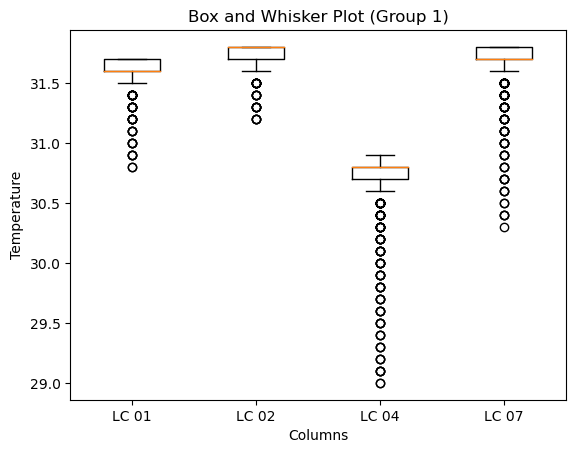

In [55]:
# Filter the data values for the selected columns (group1)
group1_data = data_values[:, [column_names.get_loc(col) for col in group1]]

# Create the box and whisker plot for group1
plt.boxplot(group1_data, labels=group1)

# Set the title and axis labels
plt.title('Box and Whisker Plot (Group 1)')
plt.xlabel('Columns')
plt.ylabel('Temperature')

# Display the plot
plt.show()


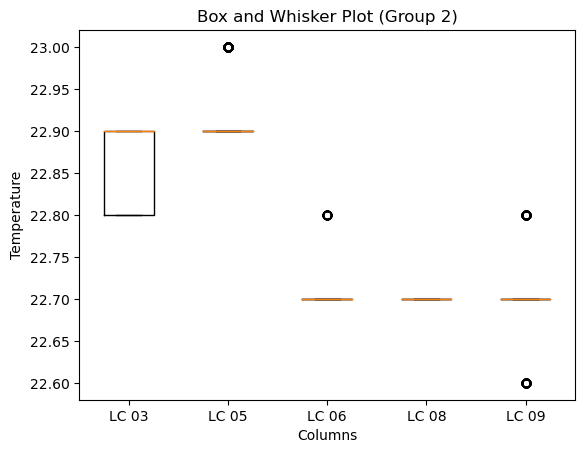

In [56]:
# Filter the data values for the selected columns (group1)
group2_data = data_values[:, [column_names.get_loc(col) for col in group2]]

# Create the box and whisker plot for group1
plt.boxplot(group2_data, labels=group2)

# Set the title and axis labels
plt.title('Box and Whisker Plot (Group 2)')
plt.xlabel('Columns')
plt.ylabel('Temperature')

# Display the plot
plt.show()

The most crucial factor to the success of the machine is the regulation of temperature to a set degree celsius. I think the most important graphs would be the distance between the average values at each location to that location's expected set value. Below are graphs for the two seperate groups and a third showing the overall difference between the expected values and the average value over the twenty four hour period.

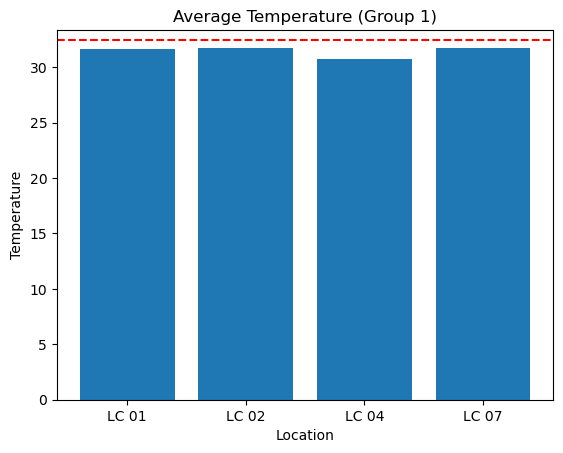

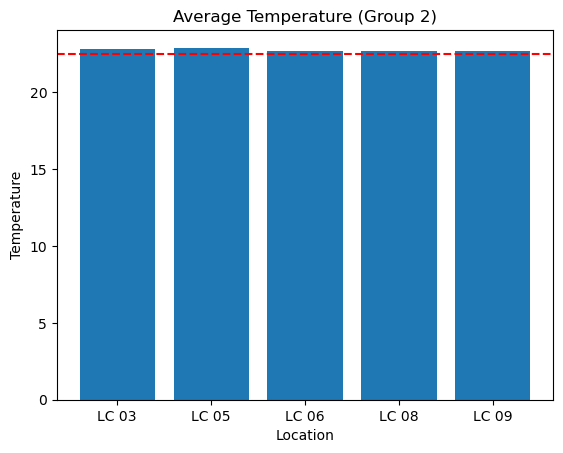

In [58]:
# Calculate the average values for each group
group1_avg = np.mean(data_values[:, [column_names.get_loc(col) for col in group1]], axis=0)
group2_avg = np.mean(data_values[:, [column_names.get_loc(col) for col in group2]], axis=0)

# Create a bar graph for group1
plt.bar(group1, group1_avg)
plt.axhline(y=32.5, color='red', linestyle='--')
plt.title('Average Temperature (Group 1)')
plt.xlabel('Location')
plt.ylabel('Temperature')
plt.show()

# Create a bar graph for group2
plt.bar(group2, group2_avg)
plt.axhline(y=22.5, color='red', linestyle='--')
plt.title('Average Temperature (Group 2)')
plt.xlabel('Location')
plt.ylabel('Temperature')
plt.show()



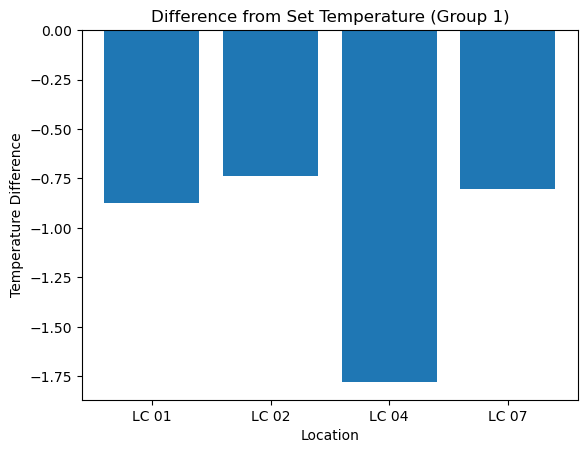

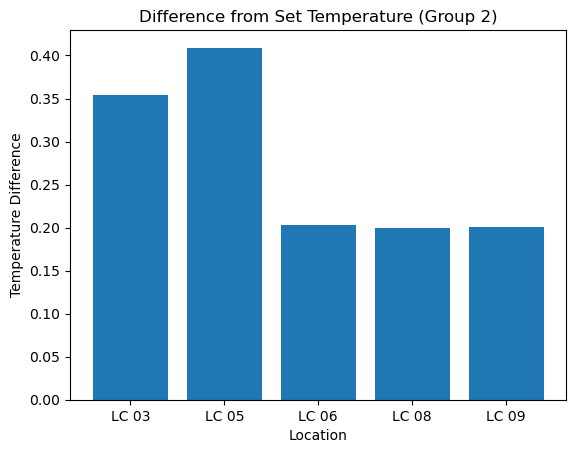

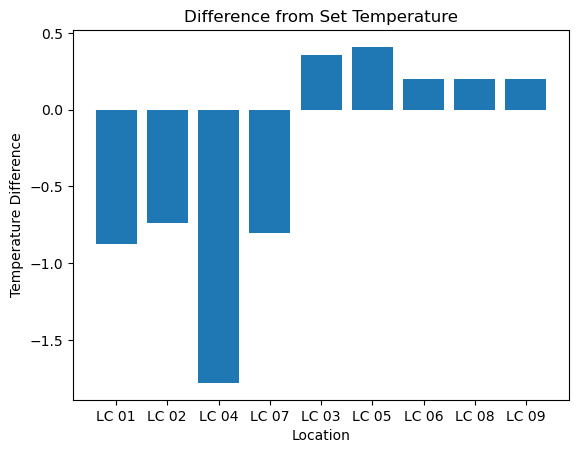

In [60]:
# Calculate the difference between average and set temperature for each group
set_temp_group1 = 32.5
set_temp_group2 = 22.5

group1_diff = group1_avg - set_temp_group1
group2_diff = group2_avg - set_temp_group2

# Create a bar graph for group1 difference
plt.bar(group1, group1_diff)
plt.title('Difference from Set Temperature (Group 1)')
plt.xlabel('Location')
plt.ylabel('Temperature Difference')
plt.show()

# Create a bar graph for group2 difference
plt.bar(group2, group2_diff)
plt.title('Difference from Set Temperature (Group 2)')
plt.xlabel('Location')
plt.ylabel('Temperature Difference')
plt.show()

# Combine the differences for both groups
combined_diff = np.concatenate([group1_diff, group2_diff])

# Create x-axis ticks for both groups
x_ticks = group1 + group2

# Create a bar graph for combined differences
plt.bar(x_ticks, combined_diff)
plt.title('Difference from Set Temperature')
plt.xlabel('Location')
plt.ylabel('Temperature Difference')
plt.show()

It becomes apparent that the average values in group one are farther from their respective set value than those in group two. With LC 04 seeing the greatest impacts.